In [1]:
import numpy as np
import cv2
from PIL import Image
import torchvision.transforms as transforms
import torch
import random

In [3]:
transform_train = transforms.Compose([
    transforms.Resize([144,144]),
    transforms.RandomCrop([128,128]),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

In [4]:
path = '/home/lecun/NAS_AIlab_dataset/dataset/cifar10/train/cat/house_cat_s_002092.png'
img = cv2.imread(path)
img = Image.fromarray(img)
img = transform_train(img)
c,w,h = img.shape
img1 = img[:,:w//2,:]
img2 = img[:,w//2:,:]
img3 = torch.cat((img2,img1),dim=1)
print(img1.shape)
print(img2.shape)
print(img3.shape)

torch.Size([3, 64, 128])
torch.Size([3, 64, 128])
torch.Size([3, 128, 128])


In [6]:
def softmax(list):
    array = np.array(list)
    exp_a = np.exp(array)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [11]:
def normalize(list):
    MAX = max(list)
    MIN = min(list)
    norm_list = [(x-MIN)/(MAX-MIN) for x in list]
    return norm_list

In [20]:
c_file = open('/home/hinton/NAS_AIlab_dataset/personal/heo_yunjae/Parameters/Uncertainty/pt4al/cifar10/classification_loss/test_classification_loss.txt', 'r')
# o_file = open('/home/hinton/NAS_AIlab_dataset/personal/heo_yunjae/Parameters/Uncertainty/pt4al/cifar10/orderprediction/orderprediction_loss.txt', 'r')
r_file = open('/home/hinton/NAS_AIlab_dataset/personal/heo_yunjae/Parameters/Uncertainty/pt4al/cifar10/rotation/test_rotation_loss.txt', 'r')

c_loss = [float(string.split('//')[0]) for string in c_file.readlines()]
# o_loss = [float(string.split('//')[0]) for string in o_file.readlines()]
r_loss = [float(string.split('//')[0]) for string in r_file.readlines()]

# c_norm = [float(np.log(1+i))/sum(c_loss) for i in c_loss]
# o_norm = [float(np.log(1+i))/sum(o_loss) for i in o_loss]
# r_norm = [float(np.log(1+i))/sum(r_loss) for i in r_loss]

c_norm = np.argsort(c_loss)
# o_norm = np.argsort(o_loss)
r_norm = np.argsort(r_loss)

c_norm = c_norm / max(c_norm)
# o_norm = o_norm / max(o_norm)
r_norm = r_norm / max(r_norm)

# c_norm = normalize(c_loss)
# o_norm = normalize(o_loss)
# r_norm = normalize(r_loss)

print(len(c_norm))
# print(len(o_norm))
print(len(r_norm))

50000
50000
50000


In [14]:
print(c_norm[:5])
# print(o_norm[:5])
print(r_norm[:5])

[0.0003079113235962434, 3.8662092094333e-05, 0.003782982000955101, 0.00047165373073526656, 0.00028673821385957277]
[3.7770664232416234e-06, 0.00016939423534217038, 1.5795034264335106e-06, 1.0850414403132413e-05, 5.013191589326723e-06]
[0.012452684037247495, 2.48018518496057e-05, 0.004775509297934786, 0.0001744726839819713, 0.021986566265089196]


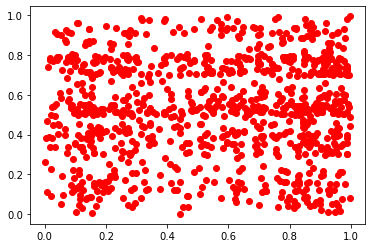

In [21]:
import matplotlib.pyplot as plt

plt.plot(c_norm[1000:2000], o_norm[1000:2000], 'ro')
plt.show()

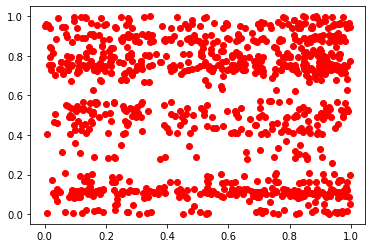

In [22]:
plt.plot(c_norm[1000:2000], r_norm[1000:2000], 'ro')
plt.show()

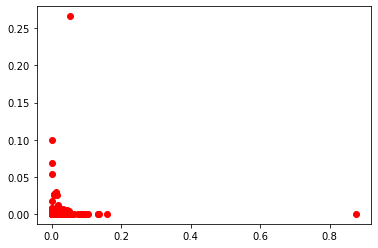

In [17]:
plt.plot(r_norm[:1000], o_norm[:1000], 'ro')
plt.show()